# <center> Final Group Project
# <center> Title: Amazon Review Comparision on Ear Buds from Apple and Samsung 
## Course: BIA 660 WS Fall 2023
## Group Names: 
- Anith Joy(CWID: 20016161)
- Cheng-Jui Ke(CWID: 10466490)
- Faith Kim(CWID: 10479600)
# PART (2): Comparative Report 

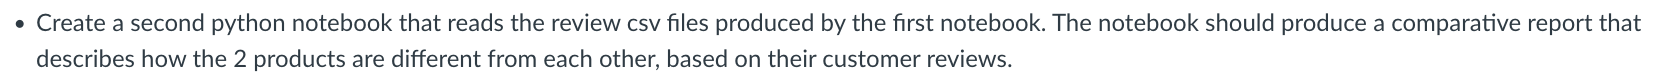

In [250]:
!pip install wordcloud
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install scikit-learn

In [251]:
import pandas as pd

In [252]:
apple = pd.read_csv("apple_earbuds_gen2.csv")
samsung = pd.read_csv("samsung_earbuds_gen2.csv")

In [253]:
apple.head()

,NAME,RATING,DATE,REVIEW
0,renee,5.0 out of 5 stars,"Reviewed in the United States on October 19, 2023","Taking the Apple AirPods at face value, they'r..."
1,Mariana,5.0 out of 5 stars,"Reviewed in the United States on November 15, ...","I love the 2nd generation Airpods, more than t..."
2,John,4.0 out of 5 stars,"Reviewed in the United States on October 15, 2023",The Apple AirPods (2nd Generation) are a popul...
3,W,5.0 out of 5 stars,"Reviewed in the United States on October 19, 2023",I love Apple products. Why? Because they are s...
4,James M.,4.0 out of 5 stars,"Reviewed in the United States on January 7, 2020","Taking the Apple AirPods at face value, they'r..."


In [254]:
samsung.head()

,NAME,RATING,DATE,REVIEW
0,Ivan,4.0 out of 5 stars,"Reviewed in the United States on October 12, 2023",At first I truly HATED these earbuds. I used t...
1,Vanessa A.,5.0 out of 5 stars,"Reviewed in the United States on November 4, 2023",I had Samsung Buds Live. I really liked them b...
2,Adrianne,4.0 out of 5 stars,"Reviewed in the United States on October 20, 2023",I really like them! I've never had high end ea...
3,Galaxy Note User,5.0 out of 5 stars,"Reviewed in the United States on September 26,...",This my 4th pair of galaxy buds. I purchased t...
4,Whitnie Douglass,4.0 out of 5 stars,"Reviewed in the United States on August 5, 2023",have gone through a lot of ear buds in hopes t...


In [255]:
apple.describe().T

,count,unique,top,freq
NAME,100,91,Amazon Customer,10
RATING,100,2,5.0 out of 5 stars,85
DATE,100,63,"Reviewed in the United States on October 19, 2023",5
REVIEW,100,99,"Taking the Apple AirPods at face value, they'r...",2


In [256]:
samsung.describe().T

,count,unique,top,freq
NAME,100,96,Amazon Customer,4
RATING,100,5,5.0 out of 5 stars,47
DATE,100,85,"Reviewed in the United States on September 7, ...",2
REVIEW,100,100,At first I truly HATED these earbuds. I used t...,1


# data cleaning

#### converting Rating Column -> "4.0 out of 5 stars" to "4.0"

In [257]:
apple["RATING"] = apple["RATING"].str.slice(stop=3)

In [258]:
# converting Rating into float dtype
apple.dtypes

NAME      object
RATING    object
DATE      object
REVIEW    object
dtype: object

In [259]:
apple["RATING"] = apple["RATING"].astype(float)

In [260]:
apple.dtypes

NAME       object
RATING    float64
DATE       object
REVIEW     object
dtype: object

In [261]:
apple.head()

,NAME,RATING,DATE,REVIEW
0,renee,5.0,"Reviewed in the United States on October 19, 2023","Taking the Apple AirPods at face value, they'r..."
1,Mariana,5.0,"Reviewed in the United States on November 15, ...","I love the 2nd generation Airpods, more than t..."
2,John,4.0,"Reviewed in the United States on October 15, 2023",The Apple AirPods (2nd Generation) are a popul...
3,W,5.0,"Reviewed in the United States on October 19, 2023",I love Apple products. Why? Because they are s...
4,James M.,4.0,"Reviewed in the United States on January 7, 2020","Taking the Apple AirPods at face value, they'r..."


In [262]:
# similarly for samsung
samsung["RATING"] = samsung["RATING"].str.slice(stop=3)
samsung["RATING"] = samsung["RATING"].astype(float)
samsung.dtypes

NAME       object
RATING    float64
DATE       object
REVIEW     object
dtype: object

In [263]:
samsung.head()

,NAME,RATING,DATE,REVIEW
0,Ivan,4.0,"Reviewed in the United States on October 12, 2023",At first I truly HATED these earbuds. I used t...
1,Vanessa A.,5.0,"Reviewed in the United States on November 4, 2023",I had Samsung Buds Live. I really liked them b...
2,Adrianne,4.0,"Reviewed in the United States on October 20, 2023",I really like them! I've never had high end ea...
3,Galaxy Note User,5.0,"Reviewed in the United States on September 26,...",This my 4th pair of galaxy buds. I purchased t...
4,Whitnie Douglass,4.0,"Reviewed in the United States on August 5, 2023",have gone through a lot of ear buds in hopes t...


# Comparative analysis

In [264]:
common_names = set(apple["NAME"]).intersection(set(samsung["NAME"]))
common_names

{'Amazon Customer'}

In [265]:
apple_common = apple[apple["NAME"] == "Amazon Customer"]
print("Total common customer in apple - ",apple_common.count()["NAME"])
print("Common custumer Name - ",common_names)

Total common customer in apple -  10
Common custumer Name -  {'Amazon Customer'}


In [266]:
samsung_common = samsung[samsung["NAME"] == "Amazon Customer"]
print("Total common customer in samsung - ",samsung_common.count()["NAME"])
print("Coomon custumer Name - ",common_names)

Total common customer in samsung -  4
Coomon custumer Name -  {'Amazon Customer'}


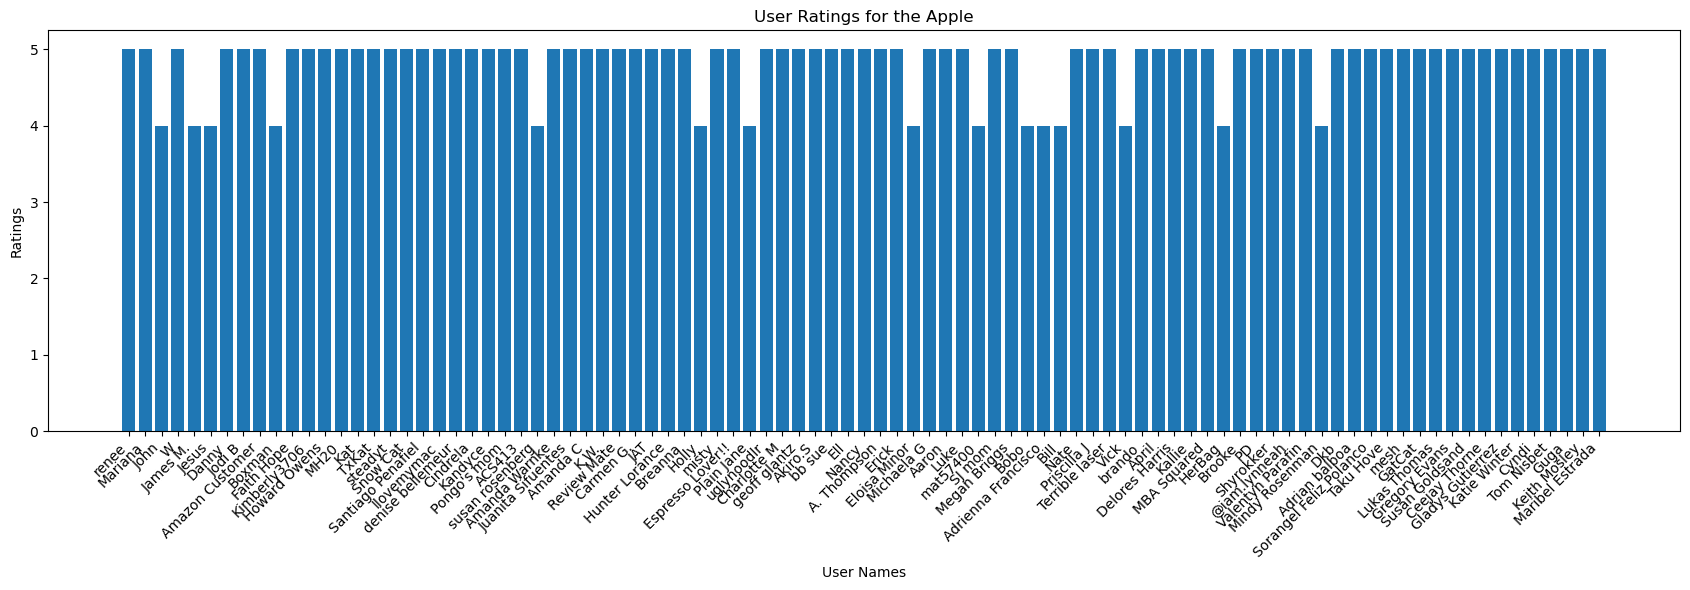

In [267]:
import matplotlib.pyplot as plt


plt.figure(figsize=(17, 6)) 
plt.bar(apple['NAME'], apple['RATING'])
plt.xlabel('User Names')
plt.ylabel('Ratings')
plt.title('User Ratings for the Apple')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

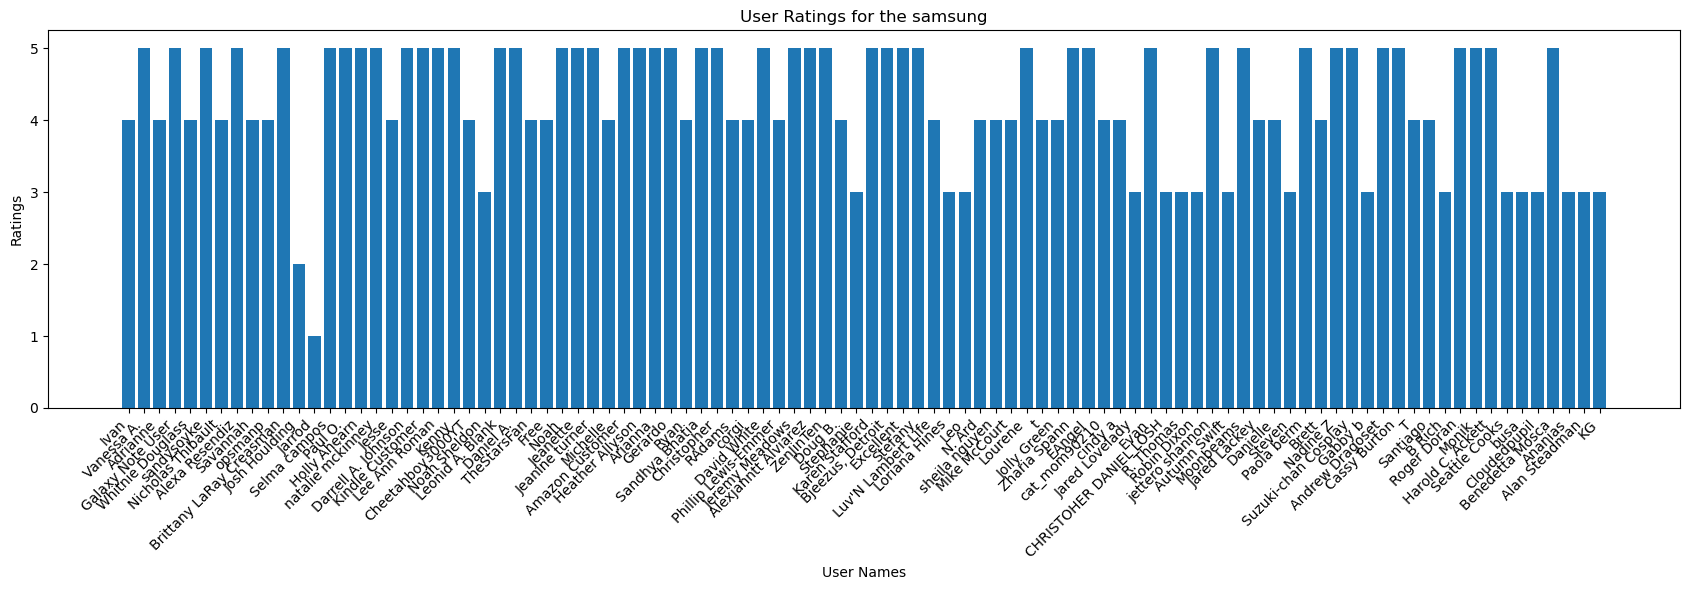

In [268]:
plt.figure(figsize=(17, 6)) 
plt.bar(samsung['NAME'], samsung['RATING'])
plt.xlabel('User Names')
plt.ylabel('Ratings')
plt.title('User Ratings for the samsung')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [269]:
# average rating of each product
avg_rating_apple = apple["RATING"].mean()
avg_rating_samsung = samsung["RATING"].mean()
avg_rating_apple,avg_rating_samsung

(4.85, 4.21)

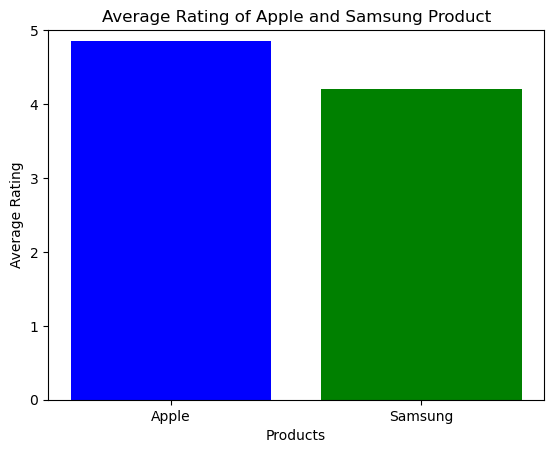

In [270]:
products = ['Apple', 'Samsung']
average_ratings = [avg_rating_apple, avg_rating_samsung]

# Bar plot
plt.bar(products, average_ratings, color=['blue', 'green'])
plt.xlabel('Products')
plt.ylabel('Average Rating')
plt.title('Average Rating of Apple and Samsung Product')
plt.ylim(0, 5)  
plt.show()

In [271]:
import csv
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import sent_tokenize,word_tokenize

In [272]:
def extract_adjectives_and_nouns(comment):
    words = word_tokenize(comment)
    tagged_words = pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos == 'JJ']
    nouns = [word for word, pos in tagged_words if pos == 'NN' or pos == 'NNS']
    return ' '.join(adjectives + nouns)

In [273]:
apple['Adjectives_Nouns'] = apple['REVIEW'].apply(extract_adjectives_and_nouns)
samsung['Adjectives_Nouns'] = samsung['REVIEW'].apply(extract_adjectives_and_nouns)
apple,samsung

(               NAME  RATING  \
 0             renee     5.0   
 1           Mariana     5.0   
 2              John     4.0   
 3                 W     5.0   
 4          James M.     4.0   
 ..              ...     ...   
 95             Guga     5.0   
 96     Keith Mosley     5.0   
 97  Maribel Estrada     5.0   
 98  Amazon Customer     5.0   
 99  Amazon Customer     5.0   
 
                                                  DATE  \
 0   Reviewed in the United States on October 19, 2023   
 1   Reviewed in the United States on November 15, ...   
 2   Reviewed in the United States on October 15, 2023   
 3   Reviewed in the United States on October 19, 2023   
 4    Reviewed in the United States on January 7, 2020   
 ..                                                ...   
 95  Reviewed in the United States on October 22, 2023   
 96  Reviewed in the United States on October 19, 2023   
 97  Reviewed in the United States on November 18, ...   
 98  Reviewed in the United States

In [274]:
from sklearn.feature_extraction.text import CountVectorizer

In [275]:
# Bringing all reviews together for counter vectorizer
apple_comments = "".join(apple["Adjectives_Nouns"].fillna("").values)
samsung_comments = "".join(samsung["Adjectives_Nouns"].fillna("").values)

In [276]:
vectorizer_apple = CountVectorizer()
vectorizer_samsung = CountVectorizer()

In [277]:
apple_word_count = vectorizer_apple.fit_transform([apple_comments])
samsung_word_count = vectorizer_samsung.fit_transform([samsung_comments])

In [278]:
apple_word_count,samsung_word_count

(<1x1023 sparse matrix of type '<class 'numpy.int64'>'
 	with 1023 stored elements in Compressed Sparse Row format>,
 <1x1257 sparse matrix of type '<class 'numpy.int64'>'
 	with 1257 stored elements in Compressed Sparse Row format>)

In [279]:
apple_words = vectorizer_apple.get_feature_names_out()
apple_words

array(['100ish', '90', 'ability', ..., 'wrong', 'year', 'years'],
      dtype=object)

In [280]:
samsung_words = vectorizer_samsung.get_feature_names_out()
samsung_words

array(['10', 'ability', 'able', ..., 'years', 'yesterday', 'zoom'],
      dtype=object)

In [281]:
common_words = set(apple_words).intersection(set(samsung_words))
common_words

{'ability',
 'able',
 'absolute',
 'abysmal',
 'access',
 'accessories',
 'accidental',
 'active',
 'actual',
 'addition',
 'additional',
 'affordable',
 'air',
 'airplane',
 'airpods',
 'amazing',
 'amount',
 'and',
 'annoying',
 'anyone',
 'anything',
 'app',
 'apple',
 'applications',
 'areas',
 'aspect',
 'attention',
 'audio',
 'audiophile',
 'available',
 'average',
 'aware',
 'awesome',
 'bad',
 'bargain',
 'bass',
 'batería',
 'batter',
 'batteries',
 'battery',
 'bc',
 'big',
 'bit',
 'black',
 'block',
 'bottom',
 'box',
 'boy',
 'brand',
 'brands',
 'break',
 'breeze',
 'brilliant',
 'bud',
 'buds',
 'buen',
 'business',
 'button',
 'call',
 'calls',
 'canal',
 'canceling',
 'cancellation',
 'cancelling',
 'car',
 'care',
 'careful',
 'case',
 'cases',
 'certain',
 'charge',
 'charger',
 'charging',
 'clarity',
 'clear',
 'college',
 'colors',
 'come',
 'comfort',
 'comfortable',
 'comfy',
 'companies',
 'complaint',
 'complaints',
 'complete',
 'conclusion',
 'connect',
 'c

In [282]:
only_apple_words = set(apple_words)-set(common_words)
only_samsung_words = set(samsung_words)-set(common_words)
print("words of apple which are not in samsung")
print(only_apple_words)
print()
print("words of samsung which are not in apple")
print(only_samsung_words)


words of apple which are not in samsung
{'refurb', 'fluctuates', 'night', 'compañía', 'hoodgreat', 'liquid', 'through', 'basics', 'complements', 'dishwasher', 'hesitatet', 'charges', 'drop', 'workouts', 'uninterrupted', 'stuck', 'network', 'budget', 'universal', 'tangled', 'margin', 'non', 'own', 'satisfied', 'generic', 'featuresgood', 'activities', 'louder', 'grandma', 'class', 'beatclear', 'fácil', 'bag', 'richness', 'picksimple', 'info', 'birthday', 'resumes', 'list', 'strong', 'tunessleepless', 'tone', 'accurate', 'instruments', 'genres', 'description', 'wash', 'percent', 'usual', 'playtime', 'estado', 'gen', 'happen', 'versions', 'pricier', 'initial', 'friendly', 'legit', 'pack', 'trabajo', 'wan', 'surroundings', 'automatic', 'earphone', 'musicdaughter', 'loss', 'hassle', 'earpods', 'delivery', 'worldwrong', 'staydouble', 'subway', 'didn', 'dias', 'fallnew', 'minute', 'defaults', 'distortion', 'súper', 'walking', 'essential', 'functionsold', 'scratches', 'users', 'nominal', 'hooks

In [283]:
import numpy as np


apple_frequency = np.asarray(apple_word_count.sum(axis=0)).ravel()
top_feature_index = apple_frequency.argsort()[::-1][:10]


top_10_features = [apple_words[idx] for idx in top_feature_index]
top_10_frequencies = apple_frequency[top_feature_index]

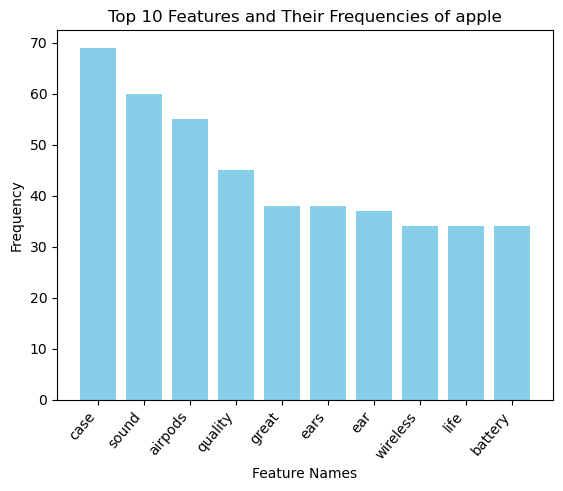

In [284]:
# Bar plot
plt.bar(top_10_features, top_10_frequencies, color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Frequency')
plt.title('Top 10 Features and Their Frequencies of apple')
plt.xticks(rotation=50, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

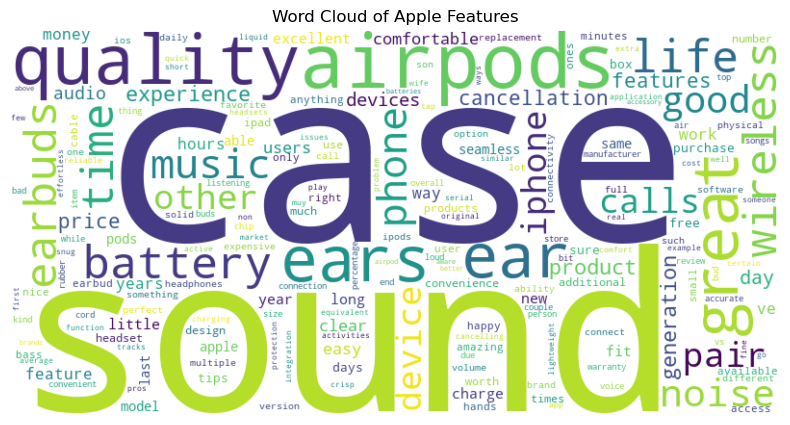

In [285]:
from wordcloud import WordCloud

# Combine feature names and frequencies into a dictionary
features_dict = dict(zip(apple_words, apple_frequency))

# Generate  word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(features_dict)

# Display 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Apple Features')
plt.show()

In [286]:
samsung_frequency = np.asarray(samsung_word_count.sum(axis=0)).ravel()
top_feature_index = samsung_frequency.argsort()[::-1][:10]


top_10_features = [samsung_words[idx] for idx in top_feature_index]
top_10_frequencies = samsung_frequency[top_feature_index]

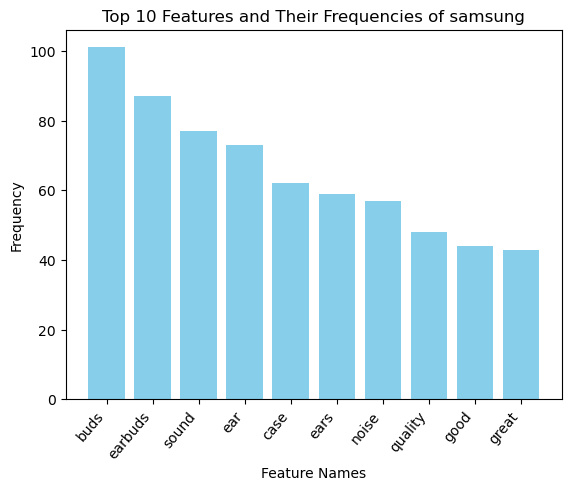

In [287]:
plt.bar(top_10_features, top_10_frequencies, color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Frequency')
plt.title('Top 10 Features and Their Frequencies of samsung')
plt.xticks(rotation=50, ha='right')  
plt.show()

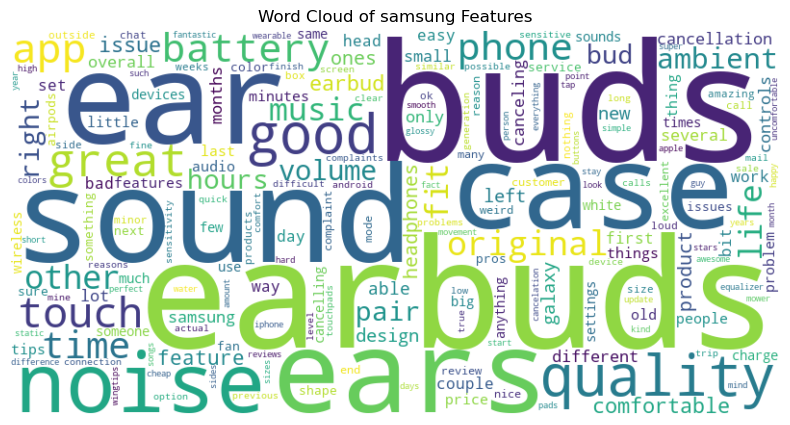

In [288]:
# Combine feature names and frequencies into a dictionary
features_dict = dict(zip(samsung_words, samsung_frequency))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(features_dict)

# Display 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of samsung Features')
plt.show()

# Lexicon of Words

In [289]:
""" 
Function to load a lexicon of positive words to a set and returns the set
parameter[in]: text input_file that contains words
return[out]: a set of words
"""
def loadLexicon(fname):
    newLex=set()
    lex_conn=open(fname)
    
    #add every word in the file to the set
    for line in lex_conn:
        newLex.add(line.strip())# remember to strip to remove the lin-change character
    lex_conn.close()

    return newLex 

In [290]:
""" 
Function to sort words with the frequencies
parameter[in]: text input_file that contains words
return[out]: a sorted dictionary[word] = frequencies
"""
def getOpinions(input_file, feature_num):
    
    #load the positive and negative lexicons into sets
    posLex=loadLexicon('positive-words.txt')
    negLex=loadLexicon('negative-words.txt')

    noun_sentiment={}#maps each noun to the number of times it appears in the same sentence as a positive or negative word
        
    fin=open(input_file,encoding='utf8')

    reader=csv.reader(fin)
    
    for line in reader: # for each review

        name,rating,date,text=line # get the text and rating
    
        sentences=sent_tokenize(text) # split the review into sentences

        for sentence in sentences: # for each sentence
        
            words=word_tokenize(sentence) # split the review into words
        
            tagged_words=nltk.pos_tag(words) # POS tagging for the words in the sentence
                #https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

            nouns_in_sentence=set() # set of all the nouns in the sentence
        
            sentiment_word_count=0 # number of positive or negative words in the sentence
        
    
            for tagged_word in tagged_words:
            
                if tagged_word[1].startswith('NN'): # if the word is a noun

                    noun=tagged_word[0].lower() # lower case the noun
                    
                    if len(noun)<3:continue # ignore nouns with less than 3 characters
                                
                    nouns_in_sentence.add(noun) # add the noun to the set
                
                if (tagged_word[0] in posLex or tagged_word[0] in negLex): 
                    sentiment_word_count+=1
                   
        
            for noun in nouns_in_sentence: # for each noun that we found in the sentence
                noun_sentiment[noun]=noun_sentiment.get(noun,0)+sentiment_word_count

    fin.close()

    #sort noun based on their total polarity counts (pos+neg)
    sorted_nouns=sorted(noun_sentiment.items(),key=lambda x:x[1],reverse=True)

    
    #get the top feature_num features
    top=sorted_nouns[:feature_num]

    return top

In [291]:
result_apple=getOpinions('samsung_earbuds_gen2.csv',15)

for noun in result_apple:
    print(noun)

('buds', 177)
('earbuds', 163)
('sound', 150)
('noise', 135)
('quality', 109)
('ears', 107)
('case', 89)
('galaxy', 82)
('samsung', 82)
('battery', 64)
('ear', 63)
('time', 58)
('life', 45)
('fit', 45)
('touch', 42)


In [292]:
result_samsung=getOpinions('apple_earbuds_gen2.csv',15)

for noun in result_samsung:
    print(noun)

('airpods', 191)
('sound', 105)
('apple', 103)
('quality', 94)
('case', 85)
('ears', 67)
('earbuds', 59)
('noise', 54)
('ear', 53)
('wireless', 51)
('generation', 49)
('cancellation', 46)
('life', 43)
('iphone', 42)
('calls', 40)


In [293]:
""" 
Function to compute distance between 2 reviews based on their sentiment
parameter[in]: review 1
parameter[in]: review 2
parameter[in]: positive lexicons
parameter[in]: negative lexicons
return[out]: the distance between 2 reviews
"""
def senti_dist(r1,r2,posLex,negLex):
    
    pos_count1,pos_count2,neg_count1,neg_count2=0,0,0,0#positive and negative counts for the 2 reviews

    for term in r1:#for each term in r1
        if term in posLex:pos_count1+=1
        elif term in negLex:neg_count1+=1
 
    for term in r2:#for each term in r2
        if term in posLex:pos_count2+=1
        elif term in negLex:neg_count2+=1
    
    #compute the sentiment score for r1 and r2
    sent_score1=(pos_count1-neg_count1)/(pos_count1+neg_count1+1)
    sent_score2=(pos_count2-neg_count2)/(pos_count2+neg_count2+1)
    
    sent_dist=abs(sent_score1-sent_score2)/2 # combine the 2 scores to compute their senti distance
    
    return sent_dist

In [294]:
"""
return[out]: square distance matrix, 
"""
def create_dist_matrix(pdDataframe):

    #load the positive and negative lexicons into sets    
    posLex=loadLexicon('positive-words.txt')
    negLex=loadLexicon('negative-words.txt')
    
    N=len(pdDataframe)

    #square distance matrix full of zeros
    sdist=np.zeros(shape=(N,N))

    terms_per_review=[]

    for i in range(N):# for each review
        if i%50==0: print(i,'reviews loaded')
        terms1=word_tokenize(reviews[i].lower()) # tokenize the first review
        terms_per_review.append(terms1)
        for j in range(i+1,N):#for each other  review

            terms2=word_tokenize(reviews[j].lower()) # tokenize the second review    

            sdist[i][j]=senti_dist(terms1,terms2,posLex,negLex) # compute the distance
            sdist[j][i]=sdist[i][j] # distance is symmetric
 
    return sdist, terms_per_review

In [295]:
"""
Perform the clustering step
parameter[in]: panda dataframe for clustering that contains rating and review
return[out]: clustering, ratings, terms
"""
def get_clusters(pdDataframe):

    ratings=pdDataframe['RATING']
    reviews=pdDataframe['REVIEW']

    sdist,terms_per_review=create_dist_matrix(pdDataframe)

    #cluster the reviews based on distance
    clustering = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average').fit(sdist)

    return clustering,ratings,terms_per_review

In [296]:
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import fisher_exact as FE

In [297]:
"""
Look for characteristic terms for each of the 2 clusters using the fisher test:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html
"""

def find_key_terms(clustering,terms_per_review):

    cluster0_term_freq={}
    cluster1_term_freq={}
    allterms=set()
    N0,N1=0,0 # total cumulative frequency of all terms in each cluster

    for i in range(len(clustering.labels_)): # for each review
        if clustering.labels_[i]==0:
            for term in terms_per_review[i]:
                cluster0_term_freq[term]=cluster0_term_freq.get(term,0)+1
                allterms.add(term)
                N0+=1
        else:
            for term in terms_per_review[i]:
                cluster1_term_freq[term]=cluster1_term_freq.get(term,0)+1
                allterms.add(term)
                N1+=1


    cluster0_distintive_terms=[]
    cluster1_distintive_terms=[]

    for term in allterms:
        freq0=cluster0_term_freq.get(term,0)
        freq1=cluster1_term_freq.get(term,0)

        score,pval=FE([[freq0,freq1],[N0-freq0,N1-freq1]])

        if pval<=0.01:
            ratio0=freq0/N0
            ratio1=freq1/N1

            if ratio0>ratio1:
                cluster0_distintive_terms.append(term)
            else:
                cluster1_distintive_terms.append(term)

    print('CLUSTER 0 DISTINCTIVE TERMS:')
    print(cluster0_distintive_terms)

    print()

    print('CLUSTER 1 DISTINCTIVE TERMS:')
    print(cluster1_distintive_terms)


In [298]:
clustering_s,scores_s,terms_per_review_s = get_clusters(samsung)

#compute the average review score for cluster0    
cluster0_scores_s=[]
for i in range(len(scores_s)):
    if clustering.labels_[i]==0:
        cluster0_scores.append(scores_s[i])
print('CLUSTER 0:',np.mean(cluster0_scores_s))        

#compute the average review score for cluster1
cluster1_scores_s=[]
for i in range(len(scores_s)):
    if clustering_s.labels_[i]==1:
        cluster1_scores_s.append(scores_s[i])
print('CLUSTER 1:',np.mean(cluster1_scores_s))        
print()
print(clustering_s.labels_)
print()
find_key_terms(clustering_s,terms_per_review_s)

0 reviews loaded
50 reviews loaded


/Users/faith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/faith/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/faith/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


CLUSTER 0: nan
CLUSTER 1: 4.142857142857143

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

CLUSTER 0 DISTINCTIVE TERMS:
[]

CLUSTER 1 DISTINCTIVE TERMS:
['súper', 'pod', 'conecta', 'y', 'la', 'at', 'se', 'its', 'dura', 'fácil', 'review', 'this']


In [299]:
clustering_a, scores_a, terms_per_review_a = get_clusters(apple)

#compute the average review score for cluster0    
cluster0_scores_a=[]
for i in range(len(scores_a)):
    if clustering_a.labels_[i]==0:
        cluster0_scores_a.append(scores_a[i])
print('CLUSTER 0:',np.mean(cluster0_scores_a))        

#compute the average review score for cluster1
cluster1_scores_a=[]
for i in range(len(scores_a)):
    if clustering_a.labels_[i]==1:
        cluster1_scores_a.append(scores_a[i])
print('CLUSTER 1:',np.mean(cluster1_scores_a))        
print()
print(clustering_a.labels_)
print()
find_key_terms(clustering_a,terms_per_review_a)

0 reviews loaded
50 reviews loaded


/Users/faith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


CLUSTER 0: 4.860215053763441
CLUSTER 1: 4.714285714285714

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

CLUSTER 0 DISTINCTIVE TERMS:
[]

CLUSTER 1 DISTINCTIVE TERMS:
['súper', 'pod', 'conecta', 'y', 'la', 'at', 'se', 'its', 'dura', 'fácil', 'review', 'this']


In [300]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
import matplotlib.pyplot as plt
import warnings
#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [301]:
samsung_rating=samsung[['REVIEW','RATING']]
avg_mask=samsung_rating['RATING']==3
pos_mask=samsung_rating['RATING']>3
neg_mask=samsung_rating['RATING']<3
samsung_rating.loc[ avg_mask, 'RATING'] ='avg'
samsung_rating.loc[ pos_mask, 'RATING'] ='pos'
samsung_rating.loc[ neg_mask, 'RATING'] ='neg'
samsung_rating['RATING'].value_counts() 

pos    79
avg    18
neg     3
Name: RATING, dtype: int64

In [302]:
apple_rating=apple[['REVIEW','RATING']]
avg_mask=apple_rating['RATING']==3
pos_mask=apple_rating['RATING']>3
neg_mask=apple_rating['RATING']<3
apple_rating.loc[ avg_mask, 'RATING'] ='avg'
apple_rating.loc[ pos_mask, 'RATING'] ='pos'
apple_rating.loc[ neg_mask, 'RATING'] ='neg'
apple_rating['RATING'].value_counts()

pos    100
Name: RATING, dtype: int64

In [303]:
train, test = train_test_split(samsung_rating, test_size=0.3)

train_text=train['REVIEW']
test_text=test['REVIEW']

train_labels=train['RATING']
test_labels=test['RATING']

In [304]:
#Build a counter based on the training dataset
counter = CountVectorizer()
counter.fit(train_text)

#count the number of times each term appears in a document and transform each doc into a count vector
counts_train = counter.transform(train_text)#transform the training data
counts_test = counter.transform(test_text)#transform the testing data

vocabulary=[x[0] for x in sorted(counter.vocabulary_.items(),key=lambda x:x[1])]

In [305]:
counter.vocabulary_.items()

dict_items([('upgrading', 1662), ('from', 605), ('three', 1580), ('year', 1777), ('old', 1045), ('cheep', 278), ('pair', 1091), ('of', 1038), ('earbuds', 468), ('went', 1722), ('30', 9), ('minutes', 945), ('battery', 153), ('life', 845), ('to', 1593), ('hours', 716), ('on', 1048), ('one', 1050), ('charge', 268), ('the', 1562), ('sound', 1456), ('quality', 1212), ('is', 781), ('good', 644), ('but', 228), ('nothing', 1023), ('special', 1465), ('do', 435), ('like', 849), ('that', 1561), ('you', 1783), ('have', 675), ('several', 1366), ('equalizer', 506), ('settings', 1363), ('app', 101), ('could', 356), ('barely', 145), ('tell', 1549), ('difference', 413), ('between', 179), ('anc', 86), ('or', 1063), ('off', 1039), ('it', 787), ('has', 674), ('hardware', 673), ('for', 593), ('isn', 782), ('majority', 900), ('noise', 1011), ('cancelation', 242), ('comes', 303), ('simply', 1392), ('having', 678), ('headphones', 683), ('seven', 1365), ('bose', 197), ('quietcomfort', 1216), ('20', 6), ('and',

In [306]:
vocabulary

['10',
 '100',
 '1130a',
 '15',
 '150',
 '1hr',
 '20',
 '2014',
 '250',
 '30',
 '360',
 '39',
 '45',
 '49',
 '4th',
 '4x',
 '60',
 '6pm',
 '75',
 '75t',
 '7a',
 '80',
 '99',
 'ability',
 'able',
 'about',
 'absentmindedly',
 'absolute',
 'absolutely',
 'abysmal',
 'accepted',
 'access',
 'accessories',
 'accidentally',
 'accidently',
 'according',
 'account',
 'acorns',
 'acoustics',
 'across',
 'activate',
 'active',
 'actual',
 'actually',
 'adamant',
 'adapter',
 'adaptive',
 'additional',
 'additionally',
 'address',
 'adjust',
 'adjusting',
 'adjustments',
 'advertised',
 'aesthetically',
 'affordable',
 'after',
 'again',
 'against',
 'airplane',
 'airpod',
 'airpods',
 'albeit',
 'all',
 'allow',
 'allowing',
 'allows',
 'almost',
 'along',
 'alot',
 'already',
 'also',
 'alternatives',
 'although',
 'always',
 'am',
 'amazed',
 'amazing',
 'amazon',
 'ambient',
 'among',
 'amongst',
 'amount',
 'amplified',
 'amzing',
 'an',
 'anc',
 'and',
 'android',
 'angle',
 'annoyance',
 

In [309]:
DT=DecisionTreeClassifier()
         
DT.fit(counts_train, train_labels)

pred=DT.predict(counts_test)

print("DecisionTree Precition Accuracy(Samsung Reviews):", accuracy_score(test_labels,pred))

DecisionTree Precition Accuracy(Samsung Reviews): 0.6333333333333333


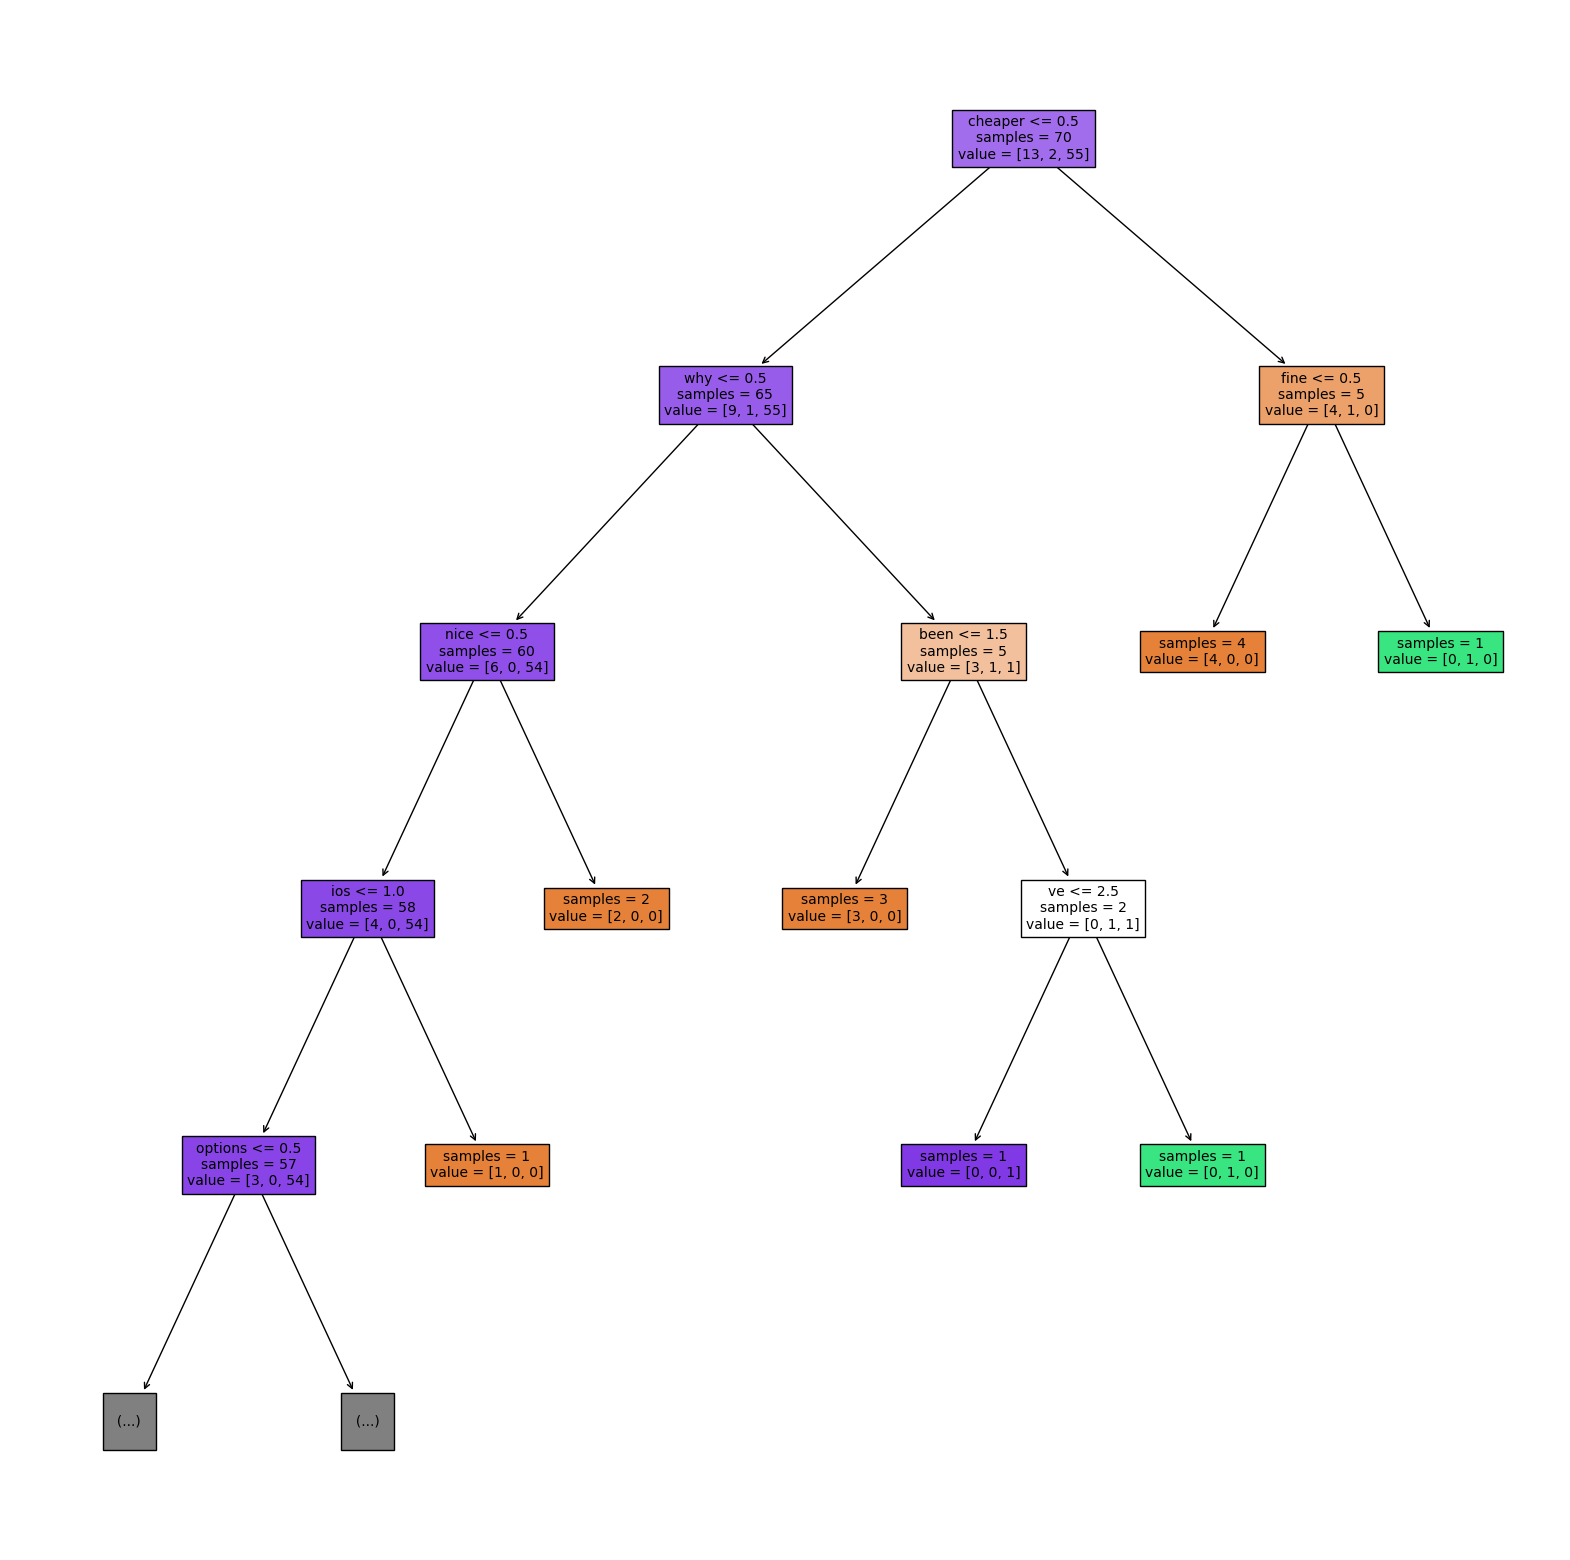

In [310]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)

tree.plot_tree(DT, 
               max_depth=4,
               filled=True, 
               impurity=False, 
               fontsize=10, 
               feature_names=vocabulary)

plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [311]:
train, test = train_test_split(apple_rating, test_size=0.3)

train_text=train['REVIEW']
test_text=test['REVIEW']

train_labels=train['RATING']
test_labels=test['RATING']

#Build a counter based on the training dataset
counter = CountVectorizer()
counter.fit(train_text)

#count the number of times each term appears in a document and transform each doc into a count vector
counts_train = counter.transform(train_text)#transform the training data
counts_test = counter.transform(test_text)#transform the testing data

vocabulary=[x[0] for x in sorted(counter.vocabulary_.items(),key=lambda x:x[1])]

DT=DecisionTreeClassifier()
         
DT.fit(counts_train, train_labels)

pred=DT.predict(counts_test)

print("DecisionTree Precition Accuracy(Apple Reviews):", accuracy_score(test_labels,pred))

DecisionTree Precition Accuracy(Apple Reviews): 1.0


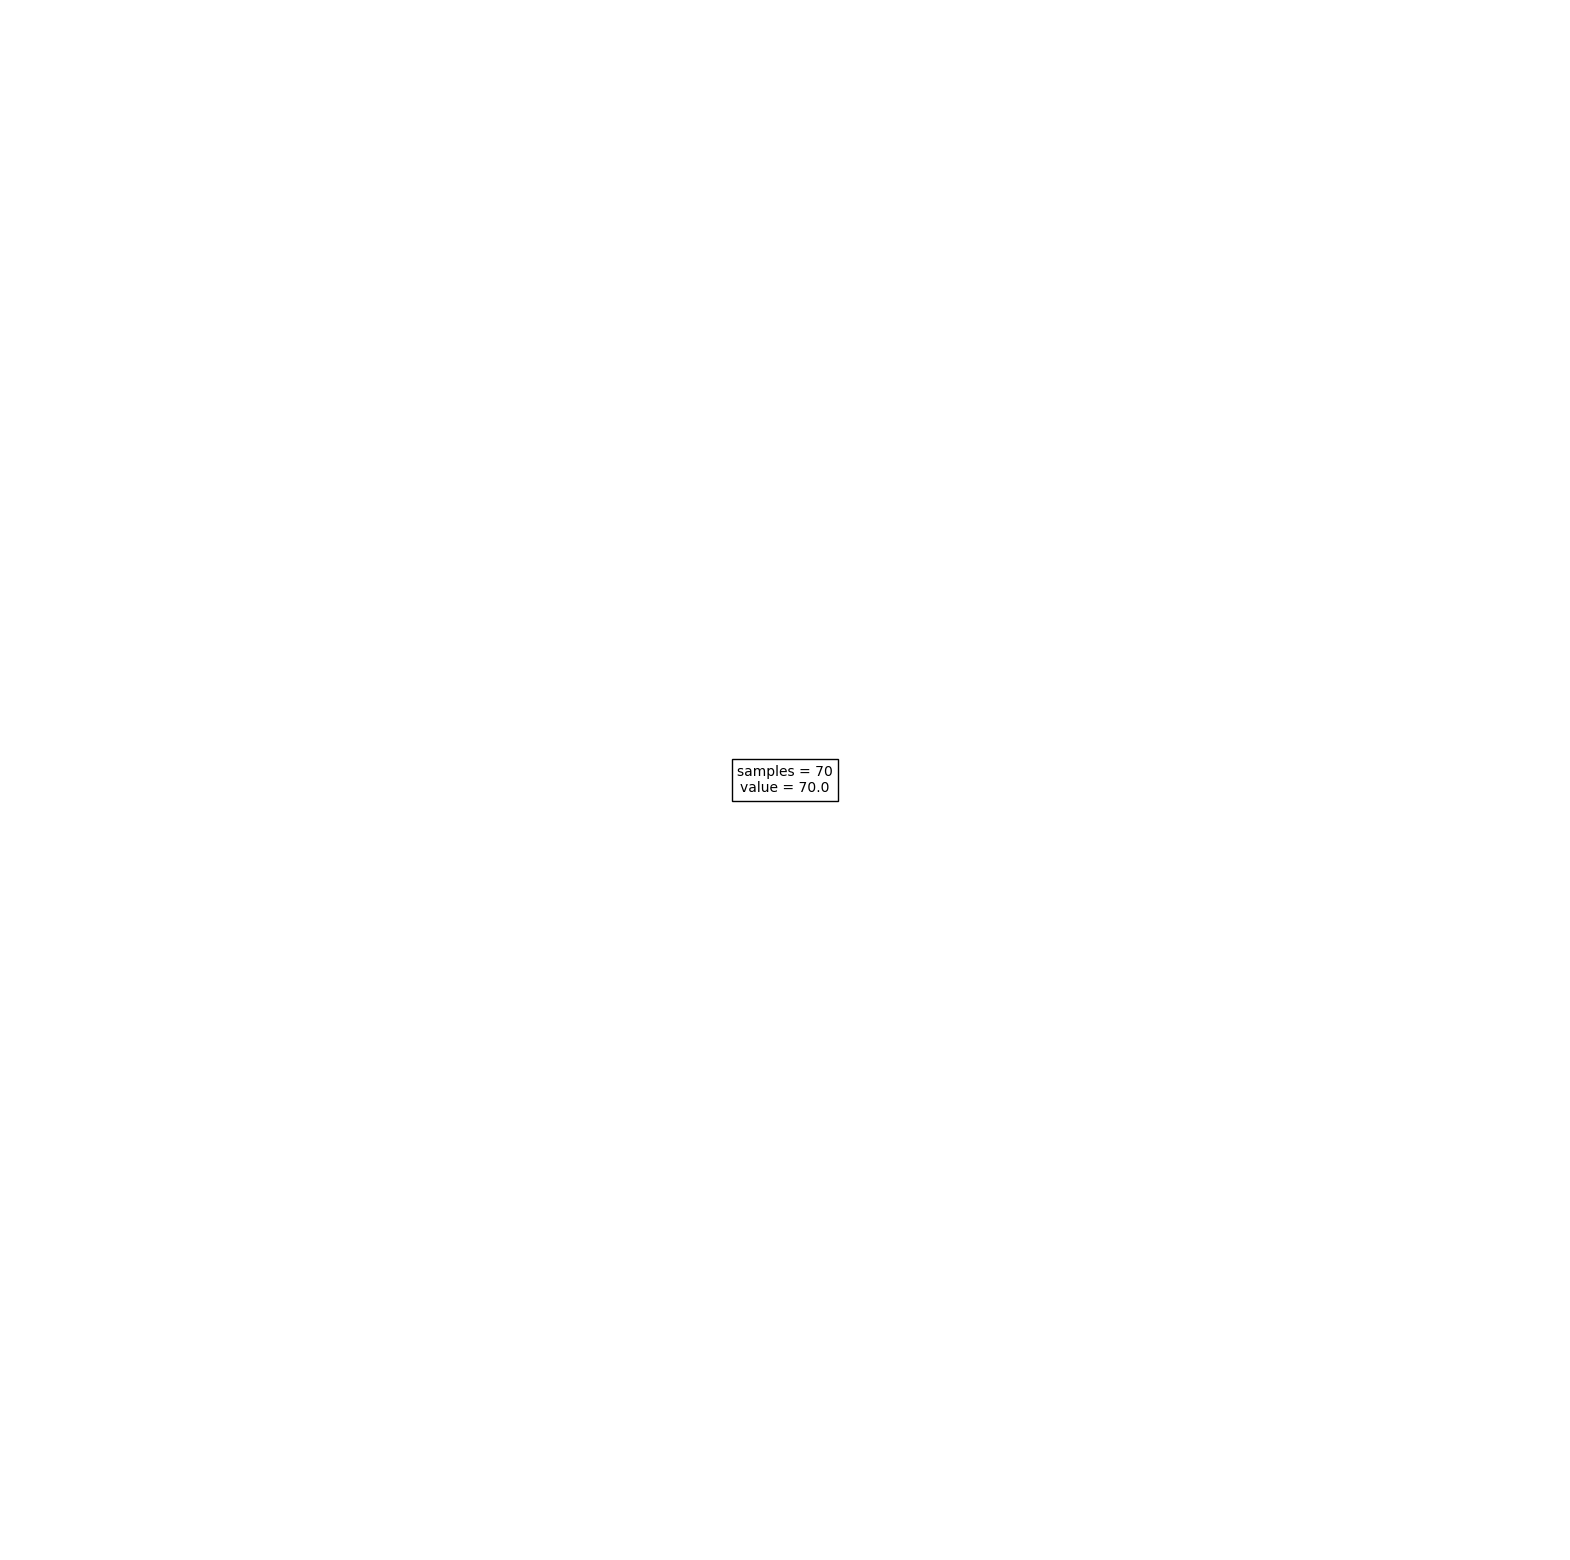

In [312]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)

tree.plot_tree(DT, 
               max_depth=4,
               filled=True, 
               impurity=False, 
               fontsize=10, 
               feature_names=vocabulary)

plt.savefig('tree.png',format='png',bbox_inches = "tight")

 # Sentiment analysis

In [13]:
import pandas as pd
from textblob import TextBlob

# Load your datasets
apple_df = pd.read_csv('apple_earbuds_gen2.csv')
samsung_df = pd.read_csv('samsung_earbuds_gen2.csv')

# Clean the 'Rating' column to extract the numerical part
apple_df['RATING'] = apple_df['RATING'].str.extract('(\d+\.\d+|\d+)').astype(float)
samsung_df['RATING'] = samsung_df['RATING'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Function to compute sentiment
def compute_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
apple_df['SENTIMENT'] = apple_df['REVIEW'].apply(compute_sentiment)
samsung_df['SENTIMENT'] = samsung_df['REVIEW'].apply(compute_sentiment)

# Explore the sentiment
print("Apple Earbuds Sentiment Analysis:")
print(apple_df['SENTIMENT'].describe())

print("\nSamsung Earbuds Sentiment Analysis:")
print(samsung_df['SENTIMENT'].describe())


Apple Earbuds Sentiment Analysis:
count    100.000000
mean       0.292371
std        0.185744
min       -0.300000
25%        0.196237
50%        0.285770
75%        0.401389
max        0.850000
Name: SENTIMENT, dtype: float64

Samsung Earbuds Sentiment Analysis:
count    100.000000
mean       0.252691
std        0.205428
min       -0.183333
25%        0.122504
50%        0.204851
75%        0.338274
max        1.000000
Name: SENTIMENT, dtype: float64


Mean shows that the overall postive sentiment and the first data mean is better with lower std shows that the first product reviews have less problem of difference between the reviews

# Time series

In [19]:
import pandas as pd

apple_df = pd.read_csv('apple_earbuds_gen2.csv')
samsung_df = pd.read_csv('samsung_earbuds_gen2.csv')

# Extract the date part and convert to datetime
apple_df['DATE'] = pd.to_datetime(apple_df['DATE'].str.extract('on (.+)$')[0])
samsung_df['DATE'] = pd.to_datetime(samsung_df['DATE'].str.extract('on (.+)$')[0])


In [20]:
from textblob import TextBlob

def compute_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
apple_df['SENTIMENT'] = apple_df['REVIEW'].apply(compute_sentiment)
samsung_df['SENTIMENT'] = samsung_df['REVIEW'].apply(compute_sentiment)


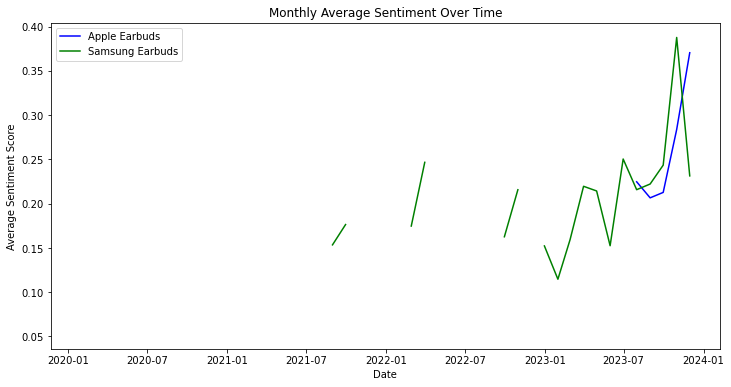

In [21]:
import matplotlib.pyplot as plt

apple_monthly = apple_df.resample('M', on='DATE')['SENTIMENT'].mean()
samsung_monthly = samsung_df.resample('M', on='DATE')['SENTIMENT'].mean()

plt.figure(figsize=(12, 6))
plt.plot(apple_monthly.index, apple_monthly, label='Apple Earbuds', color='blue')
plt.plot(samsung_monthly.index, samsung_monthly, label='Samsung Earbuds', color='green')
plt.title('Monthly Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()


From this plot shows that the apple earbuds releasing time is later that samsung earbuds
and it seems has a postive trend not like the samsung's product